# Portfolio 1: Analysis of Cycling Data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.style.use('seaborn')
%matplotlib inline

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

Read data from csv file and set index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_localize('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Join the data

Combine the two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index), keeping only the rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
df = pd.merge(strava, cheetah, left_index=True, right_index=True, how="inner")

df.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Required Analysis

Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [5]:
new_df = df[df['device_watts'] != False]
new_df = new_df.dropna(subset=['average_heartrate'])

new_df.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


#### Variable distributions

Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?  

In [6]:
key_variables = new_df[['elapsed_time','distance','Average Speed','Average Power','TSS']]
key_variables.head()

,elapsed_time,distance,Average Speed,Average Power,TSS
2018-01-27 19:39:49+00:00,17,7.6,26.0234,153.283,20.2257
2018-01-27 20:01:32+00:00,67,38.6,34.4380,186.599,94.5787
2018-02-05 21:06:42+00:00,69,24.3,22.2417,163.264,98.3269
2018-02-07 06:59:05+00:00,144,47.1,20.7841,148.253,171.0780
2018-02-09 19:18:03+00:00,193,59.8,25.6585,143.918,147.7970


In [7]:
key_variables.describe()

,elapsed_time,distance,Average Speed,Average Power,TSS
count,187.000000,187.000000,187.000000,187.000000,187.000000
mean,100.962567,36.065241,25.746931,166.114668,102.392457
std,70.300535,21.128127,4.949342,36.448304,70.089912
min,13.000000,0.000000,4.737600,0.000000,0.000000
25%,50.000000,20.250000,23.409650,145.174000,46.846800
50%,68.000000,32.100000,25.211100,162.522000,83.562000
75%,184.000000,57.950000,26.732250,189.864000,160.646500
max,254.000000,108.200000,38.350200,266.216000,412.071000


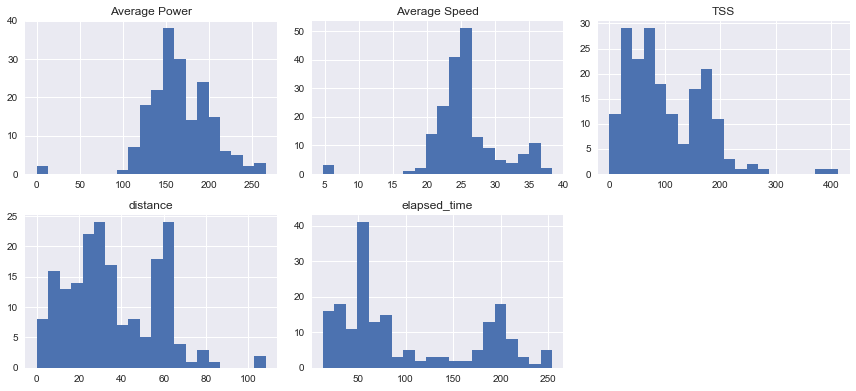

In [8]:
key_variables.hist(normed=0, histtype='stepfilled', bins= 20, figsize=(12,8), layout=(3,3))
plt.tight_layout()
plt.show()

The patterns in the above histogram describe each key variable and indicate how frequently each value occurs. Overall, the varibale distibutions are quite asymetrical. The histgram shows that TSS and distance are skewed right, whereas the other variables such as Elsaped Time, Average Power and Average Speed are bimodal.


#### Exploring the relationships between variables

Exlpore the relationships between the following variables and explain any relationships you observe:

* Distance
* Moving Time
* Average Speed
* Heart Rate
* Power (watts)
* Normalised power (NP)
* Training Stress Score
* Elevation Gain

In [10]:
#convert elevation_gain to float value
new_df['elevation_gain'] = new_df['elevation_gain'].astype(str).str.replace("m", "").astype('float64')

variables = new_df[['distance','moving_time','Average Speed','average_heartrate', 'Average Power', 'elevation_gain','NP', 'TSS']]

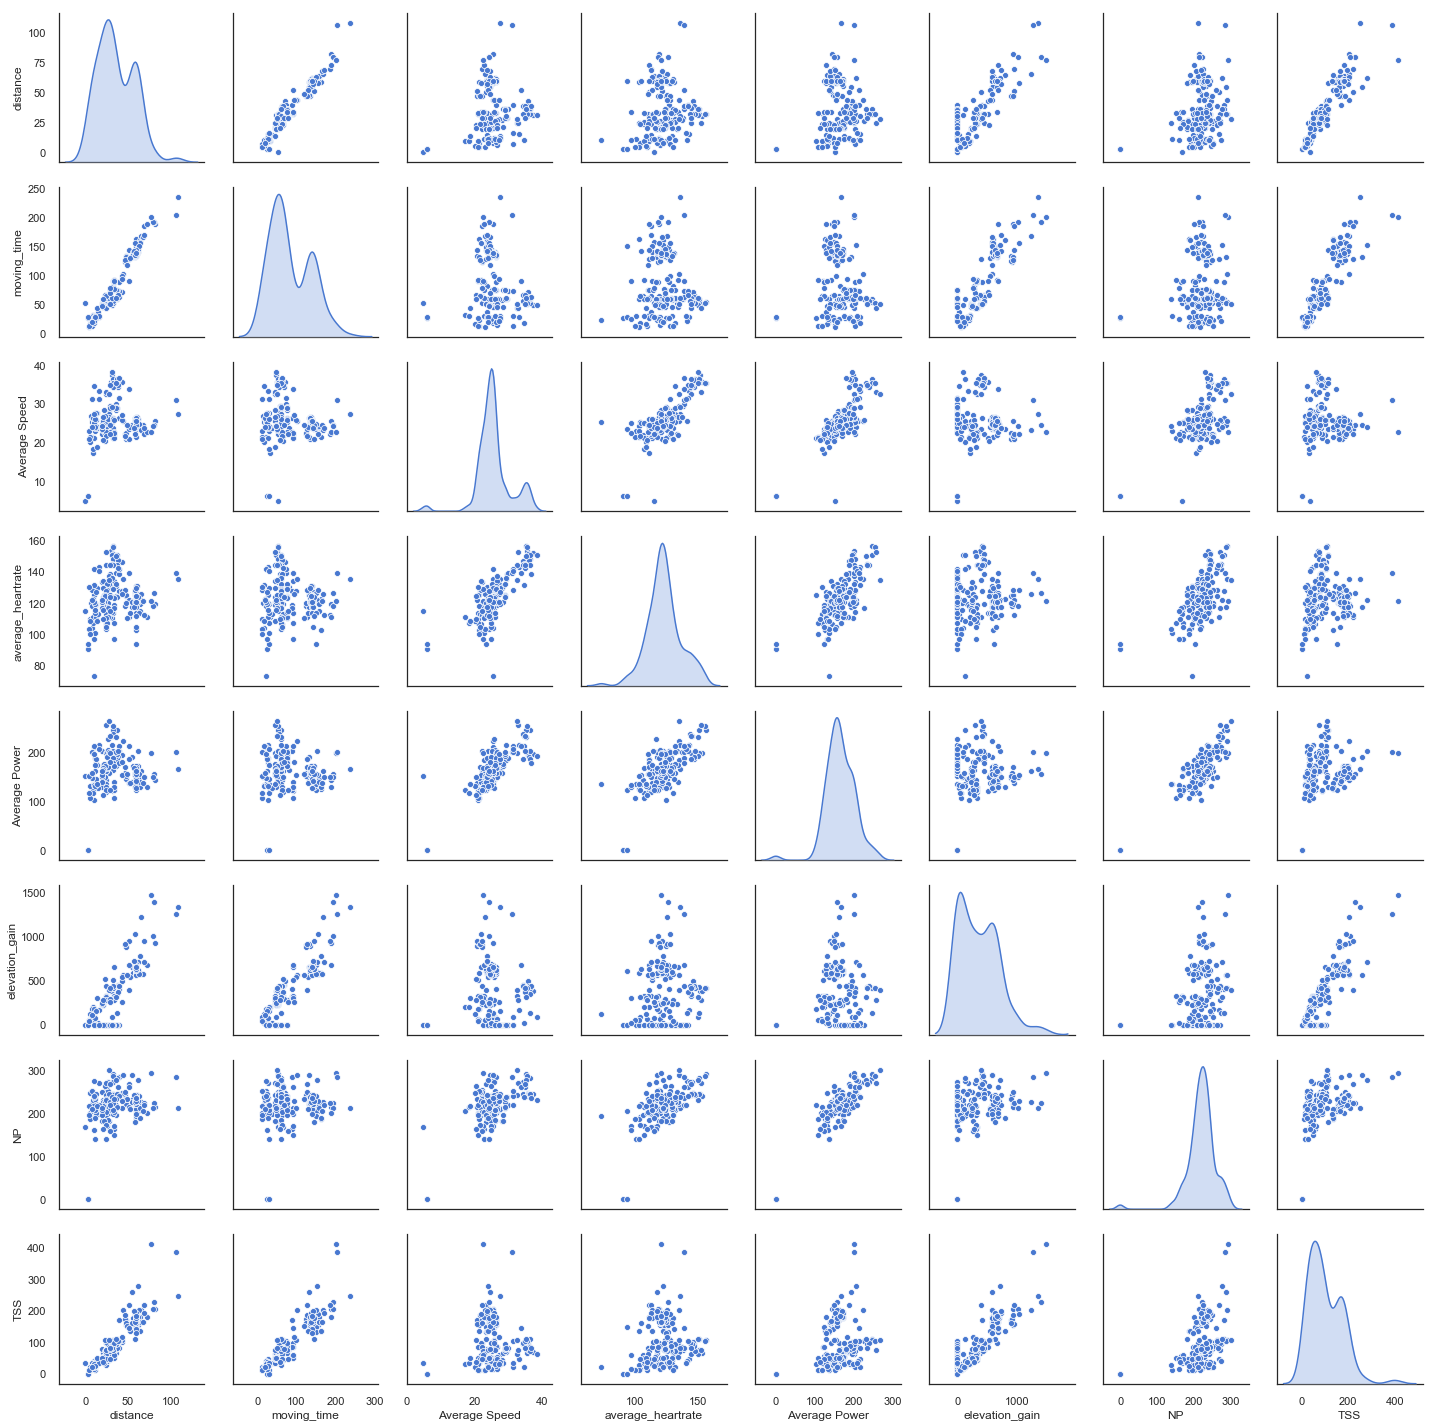

In [11]:
sns.set(style="white", palette="muted")
sns.pairplot(variables, diag_kind = 'kde')

From the above pair plot we can see that the relationships between certain variables are closely correlated with eachother. The plots depict the relationship between each variable which vary together in a predictable way. Higher rates of average speed and average power are correlated with a higher average heart rate. The more power exerted throughout a ride and more speed, the higher the average heart rate. This also correlates to a higher Training Sress Score (TSS). The relationship between moving time and distance is also predictable. A longer ride will result in a larger distance covered. Elevation gain also correlates to a higher TSS and heart rate, as more meters 'climbed' requires the cyclist to work harder.

### Analyzing categories

Explore the differences between the three categories: `Race`, `Workout` and `Ride`.
* Use scatter plots with different colours for each category to explore how these categories differ.  
* Use histograms or box plots to visualise the different distributions of a variable for the three categories.

In [12]:
workout_type= new_df[['workout_type', 'distance','Average Power', 'Average Speed', 'TSS', 'elevation_gain']]
workout_type.head(10)

,workout_type,distance,Average Power,Average Speed,TSS,elevation_gain
2018-01-27 19:39:49+00:00,Ride,7.6,153.283,26.0234,20.2257,95.0
2018-01-27 20:01:32+00:00,Race,38.6,186.599,34.4380,94.5787,449.0
2018-02-05 21:06:42+00:00,Ride,24.3,163.264,22.2417,98.3269,439.0
2018-02-07 06:59:05+00:00,Ride,47.1,148.253,20.7841,171.0780,890.0
2018-02-09 19:18:03+00:00,Ride,59.8,143.918,25.6585,147.7970,656.0
2018-02-10 20:21:37+00:00,Ride,7.8,134.175,25.3779,15.7590,92.0
2018-02-10 20:46:02+00:00,Race,31.0,198.288,37.3383,69.2902,387.0
2018-02-14 20:07:12+00:00,Ride,47.8,146.160,21.3443,155.9740,922.0
2018-02-16 19:19:04+00:00,Ride,58.6,155.020,26.3147,154.5070,659.0
2018-02-17 19:06:26+00:00,Ride,20.1,153.858,25.6788,49.1852,244.0


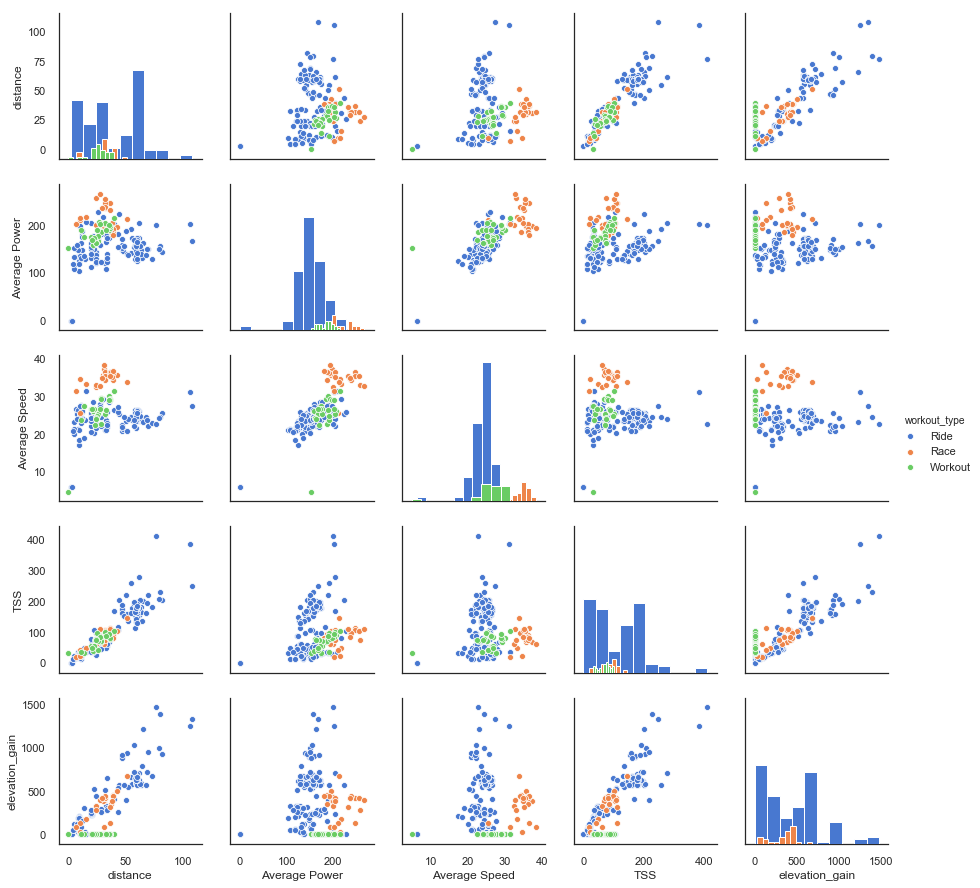

In [13]:
sns.pairplot(data=workout_type, hue='workout_type', diag_kind = 'hist')

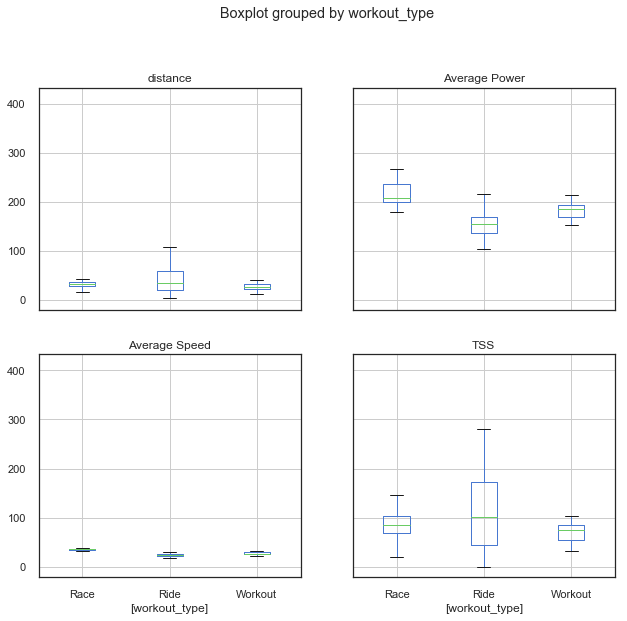

In [14]:
boxplot = workout_type.boxplot(column=['distance', 'Average Power', 'Average Speed', 'TSS'], by=['workout_type'], figsize = (10,14), layout=(3,2))

Speed, power and TSS are all elevated in the workout category of 'race' when compared to the workout type 'ride'. The race plots depict a more intense ride as indicated by the three variables. This indicates that the cyclist is working at their maximum capacity when competiting in a race. 

Overall, the type race has consistently higher values for the variables of average speed, and power, however TSS is variable among the workout types. The boxplots demonstrate that the median value for TSS is slighty higher in the ride workout type and has a larger distribution. This can be attributed to a larger amount of 'rides' as compared to the race and workout types.

## Challenge
What leads to more kudos? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe.

In [15]:
kudos = new_df[['elapsed_time','distance','Average Speed','Average Power','TSS', 'workout_type', 'kudos']]
kudos.head()

,elapsed_time,distance,Average Speed,Average Power,TSS,workout_type,kudos
2018-01-27 19:39:49+00:00,17,7.6,26.0234,153.283,20.2257,Ride,4
2018-01-27 20:01:32+00:00,67,38.6,34.4380,186.599,94.5787,Race,19
2018-02-05 21:06:42+00:00,69,24.3,22.2417,163.264,98.3269,Ride,6
2018-02-07 06:59:05+00:00,144,47.1,20.7841,148.253,171.0780,Ride,10
2018-02-09 19:18:03+00:00,193,59.8,25.6585,143.918,147.7970,Ride,22


##### Calculate the mean of kudos for each workout type

In [16]:
race = kudos[(kudos.workout_type == 'Race')]
race['kudos'].mean()

16.192307692307693

In [17]:
ride = kudos[(kudos.workout_type == 'Ride')]
ride['kudos'].mean()

11.382352941176471

In [18]:
workout = kudos[(kudos.workout_type == 'Workout')]
workout['kudos'].mean()

7.72

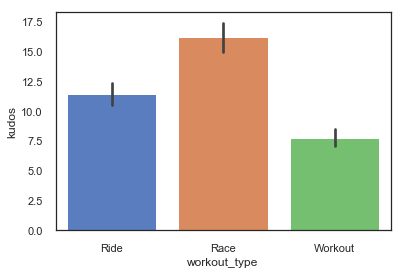

In [19]:
#plot the data to compare the mean between each workout type
sns.barplot(x="workout_type", y='kudos', data=kudos)

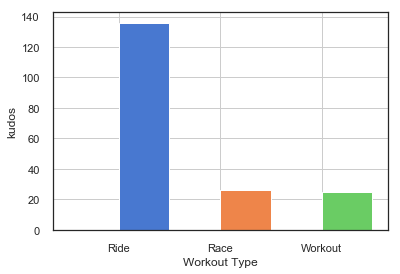

In [20]:
ride.workout_type.hist(normed=0, histtype='stepfilled', bins=2)
race.workout_type.hist(normed=0, histtype='stepfilled', bins=2)
workout.workout_type.hist(normed=0, histtype='stepfilled',bins=2)

plt.xlabel('Workout Type')
plt.ylabel('kudos')
plt.show()

The workout type has a notable impact on kudos. Higher values of kudos is associated with the race workout type, with an average rating of 16.19 compared to 11.38 for rides and 7.72 for the workout type. However, from the next graph we can see that the ride workout type actually accounts for the majority of overall kudos likes. This implies that more rides leads to more kudos. 

### Summary of Activity

Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.

In [6]:
#reformat dataframe usinf datetime function
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


In [7]:
new_df.index = new_df['date']
new_df.drop('date', axis=1)
new_df.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-28,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-06,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-10,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


In [8]:
monthly = new_df.resample('M', on='date').sum()
monthly.head()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,267.5,43.0,341.1,46.2,84,23,84,428.250,1.59795,96.9189,...,0,0,0,0,0,0,0,468.221,1.74709,114.8044
2018-02-28,1115.1,166.0,1424.6,343.1,1008,108,839,1853.666,6.91666,913.1865,...,0,0,0,0,0,0,0,2036.474,7.59878,1035.4683
2018-03-31,1326.6,195.0,1836.2,456.5,1410,148,1113,2277.830,8.49938,1173.2362,...,0,0,0,0,0,0,0,2499.605,9.32688,1345.6372
2018-04-30,1141.4,171.0,1572.2,423.6,1198,129,1002,1953.836,7.29044,1111.3385,...,0,0,0,0,0,0,0,2112.524,7.88256,1232.1499
2018-05-31,608.7,50.0,823.7,174.9,570,54,457,984.599,3.67387,425.3103,...,0,0,0,0,0,0,0,1057.498,3.94588,483.5867


In [9]:
#Get the average speed per month
speed = new_df.resample('M', on='date').mean()
speed['Average Speed']

date
2018-01-31    30.230700
2018-02-28    25.224933
2018-03-31    25.726055
2018-04-30    24.411667
2018-05-31    22.487580
2018-06-30    27.037100
2018-07-31    23.512267
2018-08-31    25.813550
2018-09-30    26.435125
2018-10-31    25.401967
2018-11-30    25.170179
2018-12-31    26.416408
2019-01-31    21.334839
2019-02-28    26.247547
2019-03-31    27.005531
2019-04-30    26.200181
2019-05-31    26.868062
2019-06-30    27.426943
2019-07-31    26.245400
Freq: M, Name: Average Speed, dtype: float64

#### Plot the activity summary

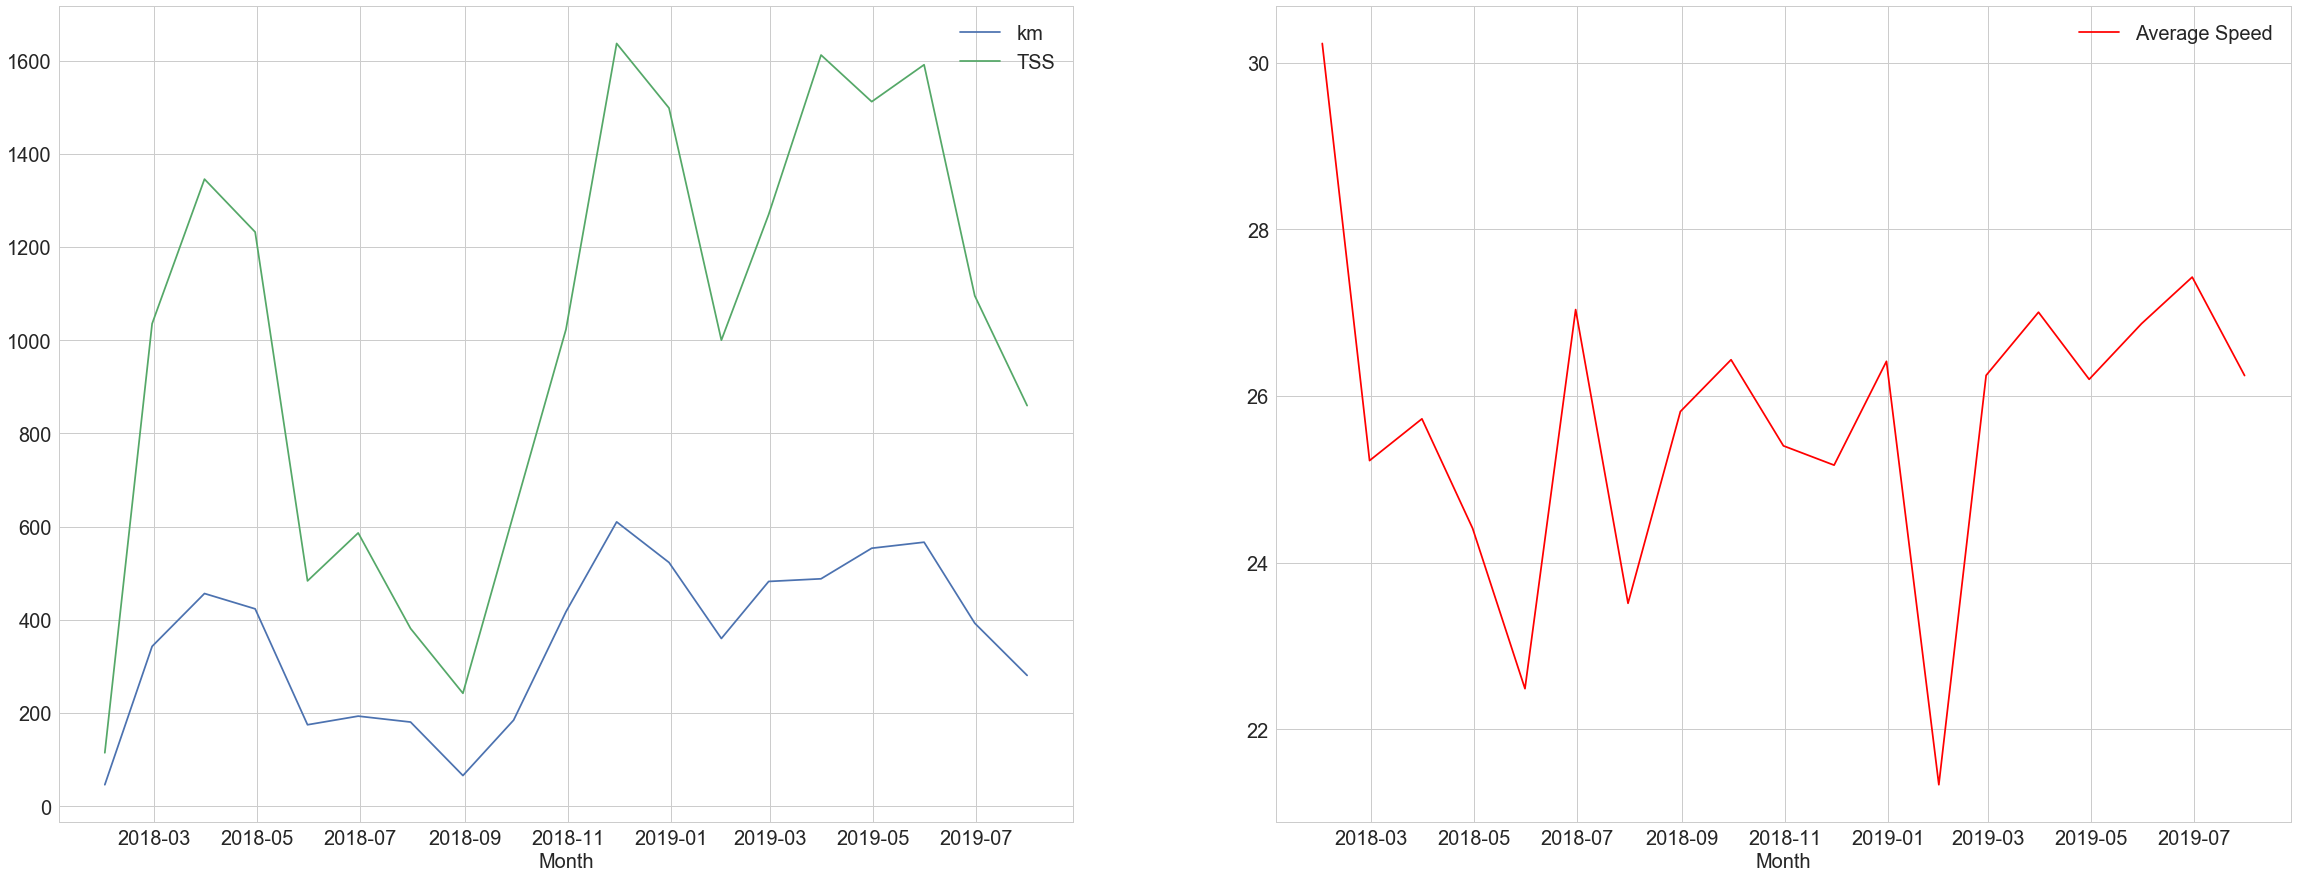

In [16]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(40,15)) ## setting over-all figure size (optional)

plt.subplot(1, 2, 1) 
plt.plot(monthly.index, monthly['distance'], label='km')
plt.plot(monthly.index, monthly['TSS'], label='TSS')  
plt.xlabel('Month', size=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

plt.subplot(1,2,2) 
plt.plot(speed.index, speed['Average Speed'], label='Average Speed', color='red')
plt.xlabel('Month',size=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

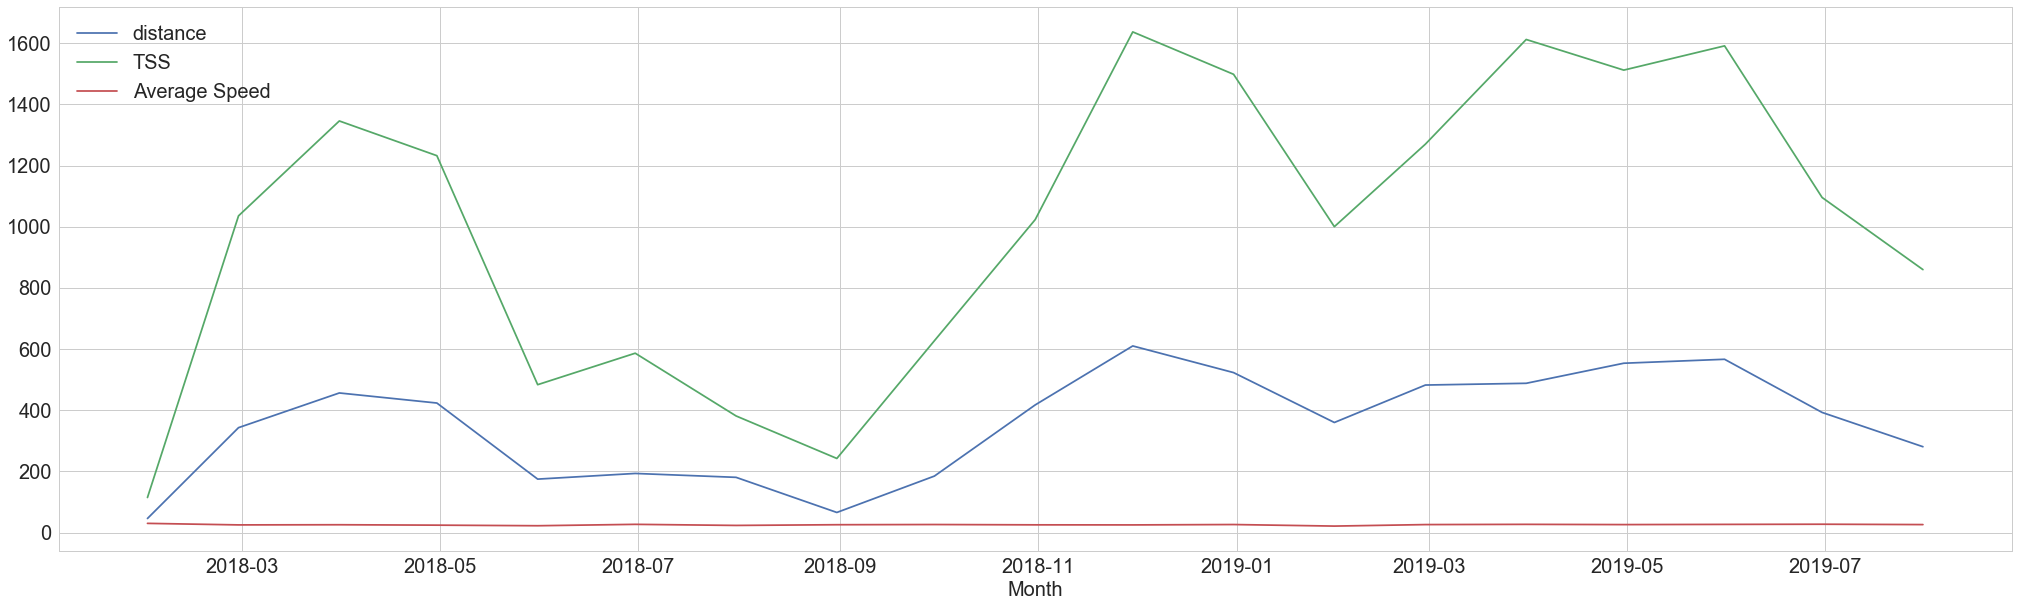

In [15]:
plt.figure(figsize=(35,10))
plt.plot(monthly.index, monthly['distance'], label='distance')
plt.plot(monthly.index, monthly['TSS'], label='TSS')
plt.plot(speed.index, speed['Average Speed'], label='Average Speed')
plt.xlabel('Month', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown. So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

In [18]:
feb = new_df[(new_df.index > '2018-02-01') & (new_df.index <= '2018-02-28')]

In [19]:
#resample dataframe by day
new_feb = feb.resample('D', on='date').sum()

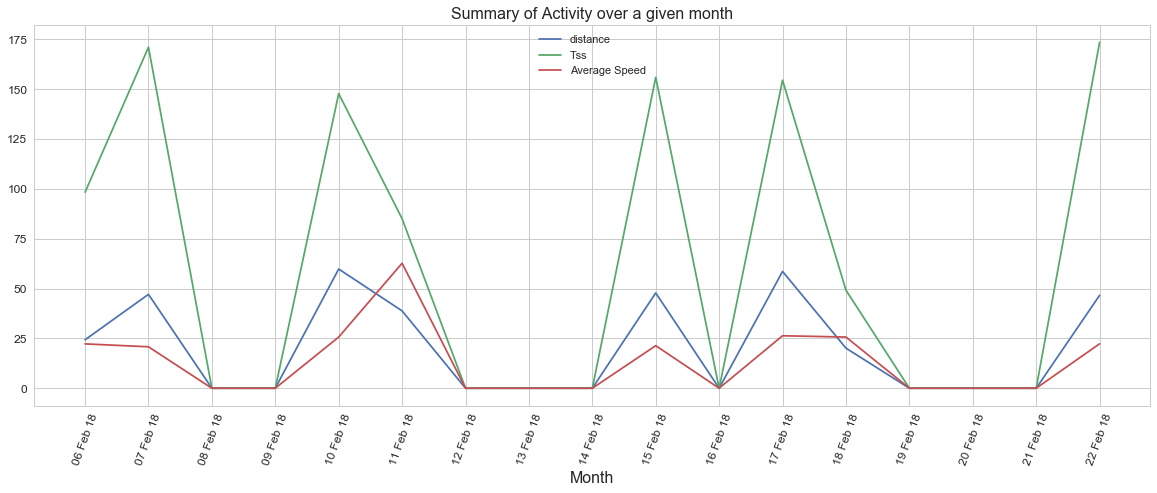

In [32]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(new_feb.index, new_feb['distance'], label='distance')
ax.plot(new_feb.index, new_feb['TSS'], label='Tss')
ax.plot(new_feb.index, new_feb['Average Speed'], label='Average Speed')


m = mdates.DateFormatter("%d %b %y")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(m)
plt.xlabel('Month', size=16)
plt.xticks(rotation=70,size=12)
plt.yticks(size=12)
plt.title('Summary of Activity over a given month',size=16)
plt.legend(fontsize=11)
plt.show()